# TF - toyproject

## Collect Data
(try to store as many data as possible to save quota)

**As we had already collected the data and stored it in IME's network,
this step isn't needed**

In [74]:
# Prerequisites:
# import requests

In [75]:
# API connections go here:

## Data Explore


In [76]:
# Prerequisites:
import pandas as pd
import numpy as np
# from google.colab import files

In [77]:
# Load dataframe from csv

# New York City Laguardia Airport Station Data:
# df = pd.read_csv("https://www.ime.usp.br/~carybe/wu_ny.csv", delimiter=';')

# São Paulo International Airport Station Data:
df = pd.read_csv("https://www.ime.usp.br/~carybe/wu_sp.csv", delimiter=';')

In [78]:
df.describe()

,Time,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,Precip.
count,1.465000e+04,14650.000000,14650.000000,14650.000000,14650.000000,14650.000000,14650.000000,14650.0
mean,1.567417e+09,20.062533,15.453963,0.763952,3.479070,0.092276,916.794080,0.0
std,1.268928e+07,4.894365,3.903878,0.158504,1.713242,1.123563,91.412104,0.0
min,1.545703e+09,-17.777778,-17.777778,0.000000,0.000000,0.000000,0.000000,0.0
25%,1.556849e+09,17.222222,13.888889,0.690000,2.235200,0.000000,923.804464,0.0
50%,1.567471e+09,20.000000,16.111111,0.830000,3.129280,0.000000,925.836292,0.0
75%,1.579017e+09,22.777778,17.777778,0.880000,4.470400,0.000000,927.529482,0.0
max,1.588907e+09,35.000000,22.777778,1.000000,13.858240,23.693120,938.365898,0.0


### Data Summary

In [79]:
print(df.dtypes)

Time             int64
Temperature    float64
Dew Point      float64
Humidity       float64
Wind            object
Wind Speed     float64
Wind Gust      float64
Pressure       float64
Precip.        float64
Condition       object
dtype: object


In [80]:
print(df)

             Time  Temperature  Dew Point  ...    Pressure Precip.      Condition
0      1545786000    20.000000  17.222222  ...  925.836292     0.0         Cloudy
1      1545786600    20.000000  17.222222  ...  925.836292     0.0         Cloudy
2      1545703200    20.000000  17.222222  ...  924.820378     0.0     Light Rain
3      1545706800    20.000000  17.222222  ...  924.820378     0.0         Cloudy
4      1545709440    20.000000  17.222222  ...  923.804464     0.0  Mostly Cloudy
...           ...          ...        ...  ...         ...     ...            ...
14645  1588903260    12.777778  10.000000  ...  931.254500     0.0  Mostly Cloudy
14646  1588904220    12.777778  10.000000  ...  931.254500     0.0  Partly Cloudy
14647  1588905060    12.777778  10.000000  ...  931.254500     0.0  Mostly Cloudy
14648  1588905720    12.777778  11.111111  ...  931.254500     0.0  Mostly Cloudy
14649  1588906740    12.777778  11.111111  ...  931.254500     0.0  Mostly Cloudy

[14650 rows x 1

#### Categorical

In [81]:
# 'N/A' is translated to nan
df['Wind'].unique()

array(['VAR', 'E', 'ESE', 'SE', 'SSE', 'S', 'ENE', 'SSW', 'NE', 'NNE',
       'N', 'NNW', 'NW', 'WNW', 'SW', 'W', 'WSW', 'CALM', nan],
      dtype=object)

In [82]:
df['Condition'].unique()

array(['Cloudy', 'Light Rain', 'Mostly Cloudy', 'Partly Cloudy', 'Fair',
       'Fog', 'Light Rain with Thunder', 'T-Storm',
       'Showers in the Vicinity', 'Light Rain / Windy', 'Thunder',
       'Heavy T-Storm', 'Rain', 'Heavy Rain', 'Thunder in the Vicinity',
       'T-Storm / Windy', 'Thunder and Hail', 'Heavy T-Storm / Windy',
       'Light Drizzle', 'Rain Shower', 'Mostly Cloudy / Windy',
       'Rain / Windy', 'Rain Shower / Windy', 'Haze',
       'Partly Cloudy / Windy', 'Drizzle', 'Fair / Windy',
       'Light Rain Shower', 'Heavy Drizzle'], dtype=object)

#### Numerical

In [83]:
df.describe()

,Time,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,Precip.
count,1.465000e+04,14650.000000,14650.000000,14650.000000,14650.000000,14650.000000,14650.000000,14650.0
mean,1.567417e+09,20.062533,15.453963,0.763952,3.479070,0.092276,916.794080,0.0
std,1.268928e+07,4.894365,3.903878,0.158504,1.713242,1.123563,91.412104,0.0
min,1.545703e+09,-17.777778,-17.777778,0.000000,0.000000,0.000000,0.000000,0.0
25%,1.556849e+09,17.222222,13.888889,0.690000,2.235200,0.000000,923.804464,0.0
50%,1.567471e+09,20.000000,16.111111,0.830000,3.129280,0.000000,925.836292,0.0
75%,1.579017e+09,22.777778,17.777778,0.880000,4.470400,0.000000,927.529482,0.0
max,1.588907e+09,35.000000,22.777778,1.000000,13.858240,23.693120,938.365898,0.0


#### Dataframe Viz

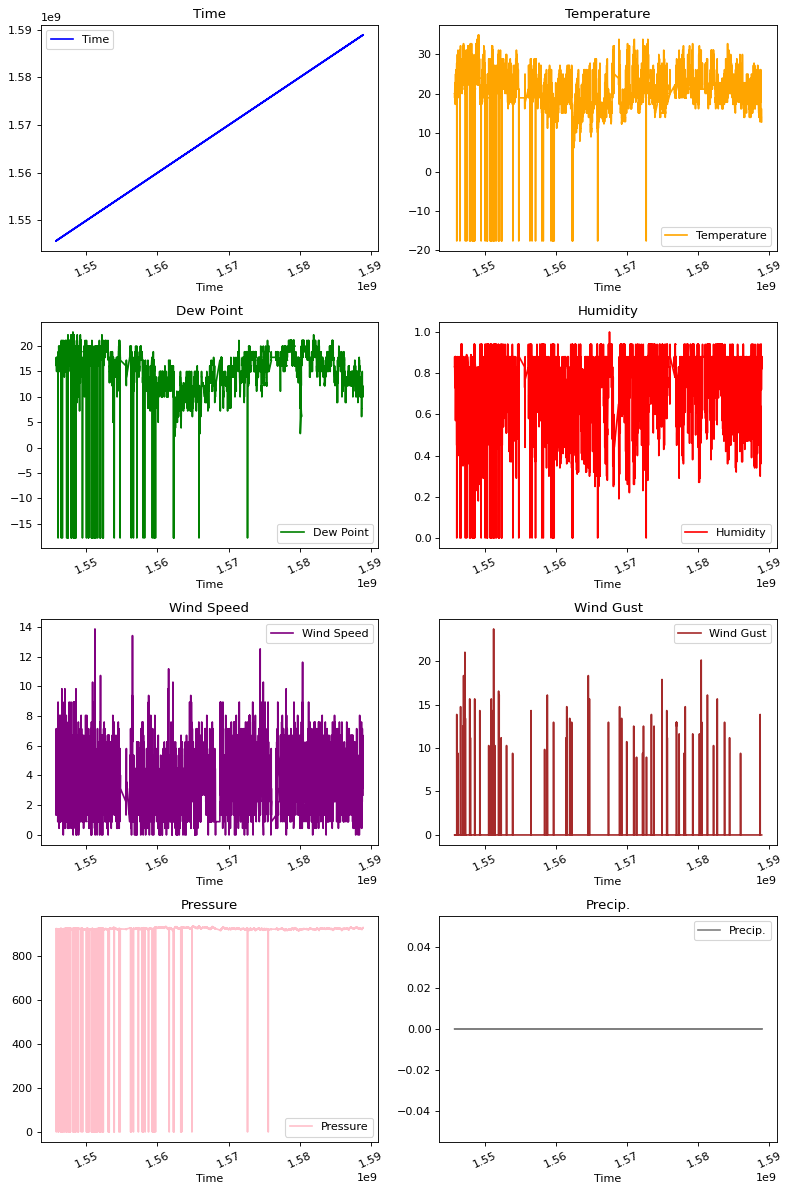

In [84]:
from matplotlib import pyplot as plt
def show_raw_visualization(data):
  data = data.drop(['Condition','Wind'], axis=1)
  time_data = data['Time']
  data_features = data.keys()
  data_feature_count = len(data_features)
  fig, axes = plt.subplots(
    nrows=int(data_feature_count/2.0+0.5), ncols=2, figsize=(10, 15), dpi=80, facecolor="w", edgecolor="k"
  )
  colors = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
  ]
  for i in range(len(data.keys())):
    key = data.keys()[i]
    c = colors[i % (len(colors))]
    t_data = data[key]
    t_data.index = time_data
    t_data.head()
    ax = t_data.plot(
      ax=axes[i // 2, i % 2],
      color=c,
      title="{}".format(key),
      rot=25,
      )
    ax.legend([key])
  plt.tight_layout()

show_raw_visualization(df)

##### Correlation Heatmap

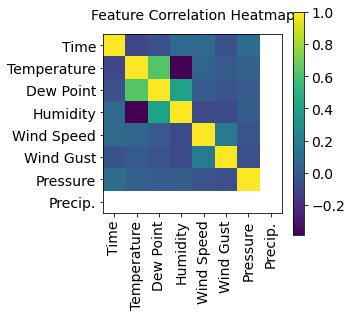

In [85]:
def show_heatmap(data):
    plt.matshow(data.corr())
    plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=90)
    plt.gca().xaxis.tick_bottom()
    plt.yticks(range(data.shape[1]), data.columns, fontsize=14)

    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title("Feature Correlation Heatmap", fontsize=14)
    plt.show()

show_heatmap(df.drop(['Condition','Wind'], axis=1))

## Preprocess Data

### Data Clean

In [86]:
df1 = df.copy(deep=True)

In [87]:
df1 = df1.dropna()

In [88]:
# General data restriction
# Any numerical data that equals 0.0 is probably a
# default value for missing data at the server

df1 = df1[df1['Time'] > 0]

df1 = df1[df1['Temperature'] > -100]

df1 = df1[df1['Dew Point'] > -100]

df1 = df1[df1['Humidity'] >= 0]

# Purged at `.dropna()`
# df1 = df1[df1['Wind']]

df1 = df1[df1['Wind Speed'] >= 0]

df1 = df1[df1['Wind Gust'] >= 0]

df1 = df1[df1['Pressure'] >= 10]

df1 = df1[df1['Precip.'] >= 0]

# Purged at `.dropna()`
# df1 = df1[df1['Condition']]

In [89]:
# SP specific restrictions

# We got no freezing temps
df1 = df1[df1['Temperature'] > 0]
df1 = df1[df1['Dew Point'] > 0]

# Even with variable Atmospheric pressure, the altitude will keep it higher
# than some threshold (here 700hPa)
df1 = df1[df1['Pressure'] > 700]

In [95]:
dropped_data_ratio = 1 - df1['Condition'].count() / df['Condition'].count()
print("Dropped datapoints:", dropped_data_ratio * 100, '%')

Dropped datapoints: 1.3856655290102382 %


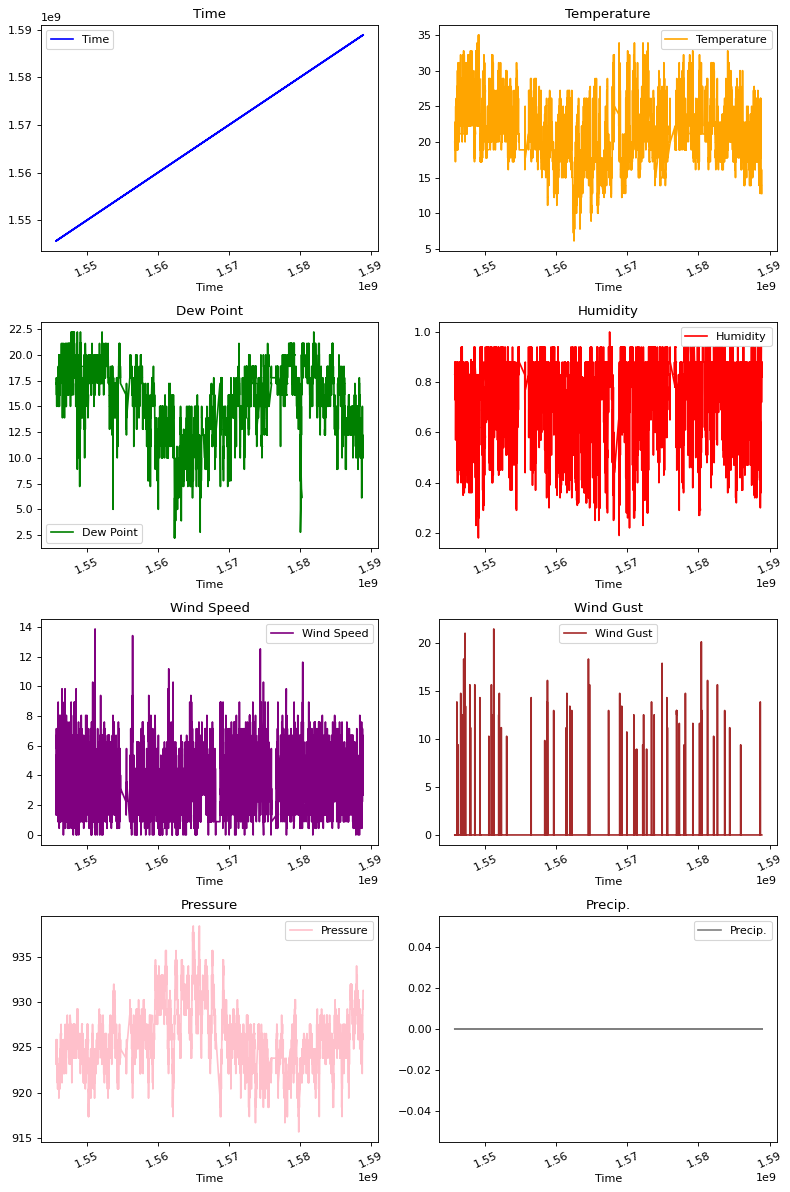

In [96]:
# Cleaned dataframe
show_raw_visualization(df1)

### Data Grouping and Enhacing

In [97]:
# Translate from Epoch
df1['TimeAgg'] = pd.to_datetime(df1['Time'],unit='s')

In [98]:
a = df1[df1["Precip."] > 0]

In [99]:
df1[df1["Precip."] > 0]['Precip.'].count() / df1['Condition'].count()

0.0

In [100]:
# "has_rain definition"

def yprecipitations(preciptation):
  return preciptation > 0

def yconditions(condition):
  import re
  if re.match(".*(Drizzle|Rain|Shower|Storm).*", condition):
    return 1
  else:
    return 0

# Checks whether the dataframe has at least 1% of precipitation field filled
if df1[df1["Precip."] > 0]['Precip.'].count() / df1['Condition'].count() > 0.01:
  target_field = 'Precip.'
  threshold_func = yprecipitations

# Otherwise, we need to inspect the conditions
else:
  target_field = 'Condition'
  threshold_func = yconditions

labelfunc = np.vectorize(threshold_func)
rain_class = labelfunc(df1[[target_field]])
df1[['has_rain']] = rain_class

In [101]:
df1.set_index('TimeAgg',inplace=True, drop=True)
print(df1)

                           Time  Temperature  ...      Condition  has_rain
TimeAgg                                       ...                         
2018-12-26 01:00:00  1545786000    20.000000  ...         Cloudy         0
2018-12-26 01:10:00  1545786600    20.000000  ...         Cloudy         0
2018-12-25 02:00:00  1545703200    20.000000  ...     Light Rain         1
2018-12-25 03:00:00  1545706800    20.000000  ...         Cloudy         0
2018-12-25 03:44:00  1545709440    20.000000  ...  Mostly Cloudy         0
...                         ...          ...  ...            ...       ...
2020-05-08 02:01:00  1588903260    12.777778  ...  Mostly Cloudy         0
2020-05-08 02:17:00  1588904220    12.777778  ...  Partly Cloudy         0
2020-05-08 02:31:00  1588905060    12.777778  ...  Mostly Cloudy         0
2020-05-08 02:42:00  1588905720    12.777778  ...  Mostly Cloudy         0
2020-05-08 02:59:00  1588906740    12.777778  ...  Mostly Cloudy         0

[14447 rows x 11 columns

In [102]:
df6hp = df1[['Temperature',
             'Humidity',
             'Pressure',
             'Precip.','has_rain']].resample('6h').agg({'min',
                                                        'max',
                                                        'mean', 
                                                        lambda x: x.quantile(0.7), 
                                                        lambda y: y.quantile(0.9),
                                                        lambda z: z.quantile(0.3),
                                                        lambda o: o.quantile(0.1),
                                                        lambda a: (a > a.shift()).sum(),
                                                        lambda b: (b < b.shift()).sum(),
                                                        lambda c: (c == c.shift()).sum()})

# MIN, MAX, MEAN, 70PERCENTILE, 90PERCENTILE, 30PERCENTILE, 10PERCENTILE, RISE, FALL, STEADY

In [103]:
df6hp.columns = ["_".join(x) for x in df6hp.columns.ravel()]
# Selecting has_rain_max as target variable
df6hp['has_rain'] = df6hp['has_rain_max']
df6hp.dtypes

Temperature_max           float64
Temperature_<lambda_0>    float64
Temperature_min           float64
Temperature_<lambda_1>    float64
Temperature_<lambda_2>    float64
Temperature_<lambda_3>    float64
Temperature_mean          float64
Temperature_<lambda_4>    float64
Temperature_<lambda_5>    float64
Temperature_<lambda_6>    float64
Humidity_max              float64
Humidity_<lambda_0>       float64
Humidity_min              float64
Humidity_<lambda_1>       float64
Humidity_<lambda_2>       float64
Humidity_<lambda_3>       float64
Humidity_mean             float64
Humidity_<lambda_4>       float64
Humidity_<lambda_5>       float64
Humidity_<lambda_6>       float64
Pressure_max              float64
Pressure_<lambda_0>       float64
Pressure_min              float64
Pressure_<lambda_1>       float64
Pressure_<lambda_2>       float64
Pressure_<lambda_3>       float64
Pressure_mean             float64
Pressure_<lambda_4>       float64
Pressure_<lambda_5>       float64
Pressure_<lamb

In [104]:
#RSN Essa parte vai ficar diferente, 
#inicialmente minha ideia é considerar o Max has_rain como variável resposta pois indica que choveu dentro das 6 horas
#df6hp.insert(loc=1, column='has_rain', value=np.where(df6hp['Precip._mean'] > 0.1,1.0,0.0))


In [105]:
# Data enhancing

for feature in ['Pressure', 'Temperature', 'Humidity', 'Precip.']:
  df6hp['%s_steady_1' % (feature)] = df6hp['%s_mean' % (feature)].shift()
  df6hp['%s_min_steady_1' % (feature)] = df6hp['%s_min' % (feature)].shift()
  df6hp['%s_max_steady_1' % (feature)] = df6hp['%s_max' % (feature)].shift()
  for i in range(7):
    df6hp['%s_steady_%d' % (feature, i+2)] = df6hp['%s_steady_%d' % (feature, i+1)].shift()
    df6hp['%s_min_steady_%d' % (feature, i+2)] = df6hp['%s_min_steady_%d' % (feature, i+1)].shift()
    df6hp['%s_max_steady_%d' % (feature, i+2)] = df6hp['%s_max_steady_%d' % (feature, i+1)].shift()
  for j in range(7):
    df6hp['%s_<lambda_%d>_1' % (feature, j)] = df6hp['%s_<lambda_%d>' % (feature, j)].shift()
    for i in range(7):
      df6hp['%s_<lambda_%d>_%d' % (feature, j, i+2)] = df6hp['%s_<lambda_%d>_%d' % (feature, j, i+1)].shift()


In [106]:
df6hp.keys()

Index(['Temperature_max', 'Temperature_<lambda_0>', 'Temperature_min',
       'Temperature_<lambda_1>', 'Temperature_<lambda_2>',
       'Temperature_<lambda_3>', 'Temperature_mean', 'Temperature_<lambda_4>',
       'Temperature_<lambda_5>', 'Temperature_<lambda_6>',
       ...
       'Precip._<lambda_5>_7', 'Precip._<lambda_5>_8', 'Precip._<lambda_6>_1',
       'Precip._<lambda_6>_2', 'Precip._<lambda_6>_3', 'Precip._<lambda_6>_4',
       'Precip._<lambda_6>_5', 'Precip._<lambda_6>_6', 'Precip._<lambda_6>_7',
       'Precip._<lambda_6>_8'],
      dtype='object', length=371)

In [133]:
df6hp_old = df6hp.copy(deep=True)

# 2nd Data clean, removing NaNs generated from grouping
df6hp = df6hp.dropna()

# This column was dropped at df6hp definition
# df6hp = df6hp.drop(columns=['TimeAgg'])

# Features that have not been grouped are removed
non_agg_feat_list = list()
for feature in ['Pressure', 'Temperature', 'Humidity', 'Precip.','has_rain']:
  non_agg_feat_list.append("%s_mean" % (feature))
  non_agg_feat_list.append("%s_min" % (feature))
  non_agg_feat_list.append("%s_max" % (feature))
  for i in range(7):
    non_agg_feat_list.append("%s_<lambda_%d>" % (feature, i))
# print(non_agg_feat_list)
df6hp.drop(columns=non_agg_feat_list, inplace=True)

dropped_data_ratio = 1 - df6hp['has_rain'].count() / df6hp_old['has_rain'].count()
print("Dropped datapoints:", dropped_data_ratio * 100, "%")

Dropped datapoints: 7.138934651290496 %


In [132]:
df6hp = df6hp_old

In [115]:
# Export the enhaced dataset
df6hp.to_csv(r'dfFinal.csv')
# files.download("dfFinal.csv")

## Model data input prepare

In [116]:
# Prerequisites
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
# from sklearn.externals import joblib
import pandas as pd

### Load Saved data

In [149]:
df6hp = pd.read_csv("dfFinal.csv")
df6hp = df6hp.drop(columns=['TimeAgg'])

In [150]:
# Splitting the data in train and test data
main_data, test_data = train_test_split(df6hp, test_size=.65) 

In [151]:
# Split each of the train and test data into inputs and outputs
X = main_data.iloc[:, 1:].values
y = main_data.iloc[:, 0].values

X_test = test_data.iloc[:, 1:].values
y_test = test_data.iloc[:, 0].values

In [152]:
# Rescale the data so it's between 0 and 1
scaler = StandardScaler()
scaler_test = StandardScaler()

X = scaler.fit_transform(X) 
X_test = scaler.fit_transform(X_test) 

## Train Models

In [153]:
# Prerequisites:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout 

In [154]:
# from https://create.arduino.cc/projecthub/danionescu/diy-rain-prediction-using-arduino-python-and-keras-abdec6
input_dimensions = X.shape[1] 
optimizer = 'rmsprop'
dropout = 0.05
kernel_init = 'uniform'
batch_size = 1
epochs = 100 

model = Sequential()
inner_nodes = int(input_dimensions / 2)

model.add(Dense(inner_nodes, kernel_initializer='uniform', activation='relu', input_dim=input_dimensions))
model.add(Dropout(rate=dropout))

model.add(Dense(inner_nodes, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(rate=dropout))

model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
model.compile(optimizer=optimizer, loss='mean_absolute_error', metrics=['accuracy']) 

model.fit(X,
          y,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_test, y_test))


Epoch 1/100
591/591 [==============================] - 1s 2ms/step - loss: 0.2290 - accuracy: 0.7800 - val_loss: 0.1974 - val_accuracy: 0.8027
Epoch 2/100
591/591 [==============================] - 1s 2ms/step - loss: 0.2127 - accuracy: 0.7868 - val_loss: 0.1977 - val_accuracy: 0.8027
Epoch 3/100
591/591 [==============================] - 1s 2ms/step - loss: 0.2085 - accuracy: 0.7885 - val_loss: 0.1972 - val_accuracy: 0.8018
Epoch 4/100
591/591 [==============================] - 1s 2ms/step - loss: 0.2037 - accuracy: 0.7953 - val_loss: 0.1924 - val_accuracy: 0.8155
Epoch 5/100
591/591 [==============================] - 2s 3ms/step - loss: 0.1730 - accuracy: 0.8342 - val_loss: 0.1850 - val_accuracy: 0.8155
Epoch 6/100
591/591 [==============================] - 2s 3ms/step - loss: 0.1779 - accuracy: 0.8206 - val_loss: 0.1832 - val_accuracy: 0.8191
Epoch 7/100
591/591 [==============================] - 1s 3ms/step - loss: 0.1587 - accuracy: 0.8443 - val_loss: 0.1916 - val_accuracy: 0.8082

### Save Model

In [156]:
# save the model for later use
model.save('Model1.h5')
# files.download("Model1.h5")

## Evaluate Model

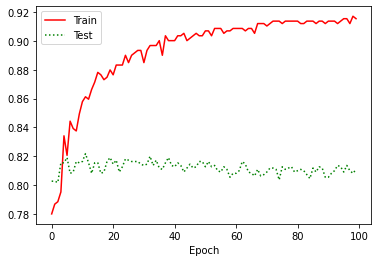

In [157]:
import matplotlib.pyplot as plt

plt.plot(model.history.history['accuracy'], 'r-')
plt.plot(model.history.history['val_accuracy'], 'g:')

plt.xlabel('Epoch')

plt.legend(['Train', 'Test'], loc='upper left')

In [158]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", results)

Evaluate on test data
9/9 [==============================] - 0s 2ms/step - loss: 0.1885 - accuracy: 0.8109
test loss, test acc: [0.1885281652212143, 0.8109090924263]


In [159]:
# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(X_test[:20])
print("predictions shape:", predictions.shape)

Generate predictions for 3 samples
predictions shape: (20, 1)


In [160]:
print(predictions)
print(y_test[:20])

[[0.0000000e+00]
 [1.0000000e+00]
 [0.0000000e+00]
 [1.3532396e-31]
 [3.8312784e-08]
 [3.8566427e-06]
 [1.7698559e-34]
 [2.9734537e-33]
 [7.8862212e-30]
 [1.7730841e-21]
 [0.0000000e+00]
 [3.3378430e-33]
 [3.0356866e-01]
 [0.0000000e+00]
 [2.2079379e-34]
 [1.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]]
[0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
